# Inferring Photometric Redshifts from Multichannel Images
## Balázs Menkó (O67UT7)
### Supervisor: Pál, Balázs 

---

# Testing the database and creating figures

In [1]:
from utils import *

In [2]:
run_query("""
    SELECT pg_size_pretty(pg_table_size('redshift')) AS size_of_redshift_table;
""")

,size_of_redshift_table
0,408 MB


In [3]:
run_query("""
    SELECT *
    FROM redshift
    LIMIT 3
""")

,index,specobjid,ra,dec,z,zerr,veldisp,veldisperr,picture
0,0,299616671037941760,145.99917,0.352445,0.143653,0.000013,0.161662,0.013259,"[7, 5, 6, 6, 4, 5, 3, 1, 2, 1, 0, 0, 1, 0, 0, ..."
1,1,305153815840057340,154.33863,-1.246887,0.094062,0.000009,0.168785,0.013659,"[12, 12, 10, 12, 12, 10, 11, 11, 9, 8, 8, 6, 3..."
2,2,305167834613311500,154.47804,-0.469954,0.181684,0.000011,0.126630,0.010545,"[7, 0, 0, 7, 0, 0, 7, 0, 0, 8, 0, 0, 10, 1, 2,..."


In [4]:
%%time
df = run_query(f"""
    SELECT *
    FROM redshift
    LIMIT 2000
""")

CPU times: user 5.1 s, sys: 1.68 s, total: 6.78 s
Wall time: 12.1 s


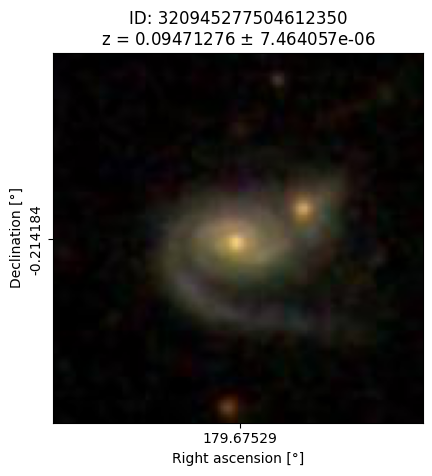

In [5]:
idx = 25
img = reshape_images(df.picture[idx])
plt.imshow(img)
plt.title(f'ID: {df.specobjid[idx]}\n'+f'z = {df.z[idx]}'+r' $\pm$ '+f'{df.zerr[idx]}')
plt.xlabel('Right ascension [°]')
plt.xticks([img.shape[0]/2], [df.ra[idx]])
plt.ylabel('Declination [°]')
plt.yticks([img.shape[1]/2], [df.dec[idx]], rotation=90)
plt.gca().get_yticklabels()[0].set_verticalalignment('center')
plt.savefig(f'figures/galaxy_id{df.specobjid[idx]}.pdf', bbox_inches='tight')
plt.show()

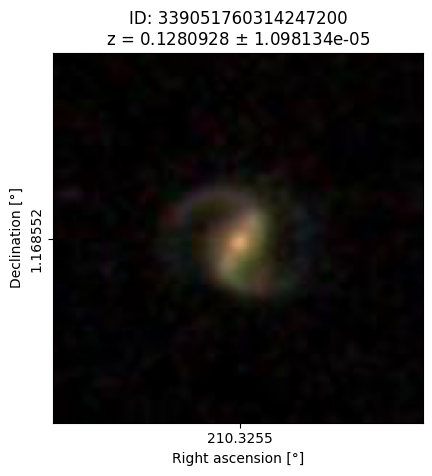

In [6]:
idx = 50
img = reshape_images(df.picture[idx])
plt.imshow(img)
plt.title(f'ID: {df.specobjid[idx]}\n'+f'z = {df.z[idx]}'+r' $\pm$ '+f'{df.zerr[idx]}')
plt.xlabel('Right ascension [°]')
plt.xticks([img.shape[0]/2], [df.ra[idx]])
plt.ylabel('Declination [°]')
plt.yticks([img.shape[1]/2], [df.dec[idx]], rotation=90)
plt.gca().get_yticklabels()[0].set_verticalalignment('center')
plt.savefig(f'figures/galaxy_id{df.specobjid[idx]}.pdf', bbox_inches='tight')
plt.show()

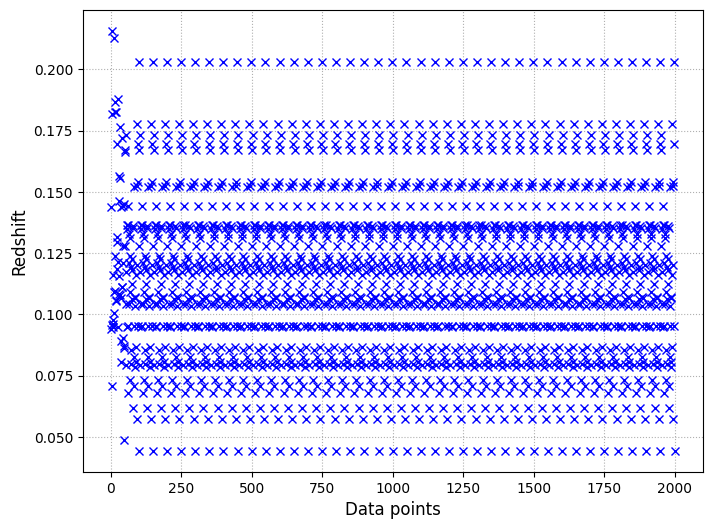

In [7]:
plt.figure(figsize=(8,6))
plt.plot(df.z, 'x', c='b')
plt.title('', fontsize=FS+3)
plt.xlabel('Data points', fontsize=FS)
plt.ylabel('Redshift', fontsize=FS)
plt.grid(ls='dotted')
plt.show()

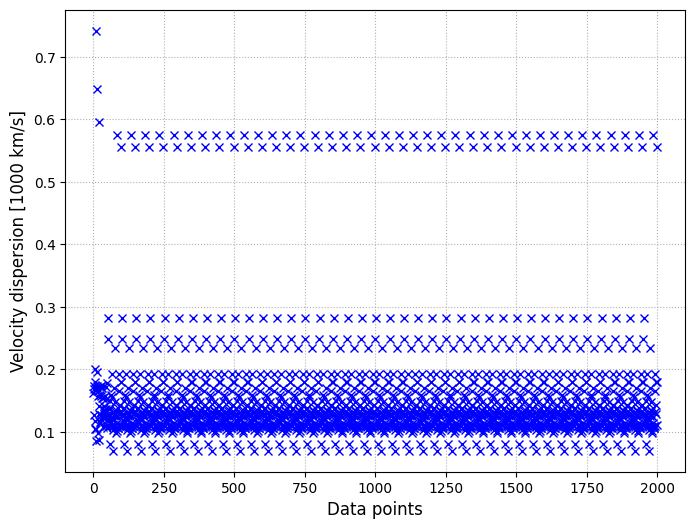

In [8]:
plt.figure(figsize=(8,6))
plt.plot(df.veldisp, 'x', c='b')
plt.title('', fontsize=FS+3)
plt.xlabel('Data points', fontsize=FS)
plt.ylabel('Velocity dispersion [1000 km/s]', fontsize=FS)
plt.grid(ls='dotted')
plt.show()